In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_halopull
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [4]:
plt.style.use('../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [5]:
m11 = np.load("../MAHs/m11_mat.npy")
m12 = np.load("../MAHs/m12_mat.npy")
m13 = np.load("../MAHs/m13_mat.npy")
m14 = np.load("../MAHs/m14_mat.npy")

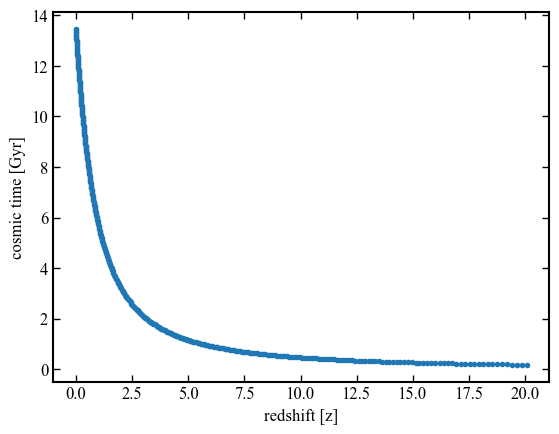

In [29]:
plt.scatter(cfg.zsample, cfg.tsample, marker=".")
plt.xlabel("redshift [z]")
plt.ylabel("cosmic time [Gyr]")
plt.show()

In [6]:
full_mat = np.array([m11, m12, m13, m14]).reshape(4000,354)

normalized = full_mat / full_mat[:, 0][:, None]
masses = np.log10(full_mat[:, 0])

In [7]:
z50s = []
z10s = []

for tree in full_mat:
    z50_i = cfg.zsample[jsm_halopull.find_nearest1(tree, tree[0]/2)]
    z10_i = cfg.zsample[jsm_halopull.find_nearest1(tree, tree[0]/10)]

    z50s.append(np.log10(1+z50_i))
    z10s.append(np.log10(1+z10_i))

z50s = np.array(z50s)
z10s = np.array(z10s)

In [8]:
z50_break = np.split(z50s, 4)
z10_break = np.split(z10s, 4)
masses_break = np.split(masses, 4)

In [13]:
z50_meds = np.array([np.median(arr) for arr in z50_break])
z10_meds = np.array([np.median(arr) for arr in z10_break])

z50_std = np.array([np.std(arr) for arr in z50_break])
z10_std = np.array([np.std(arr) for arr in z10_break])

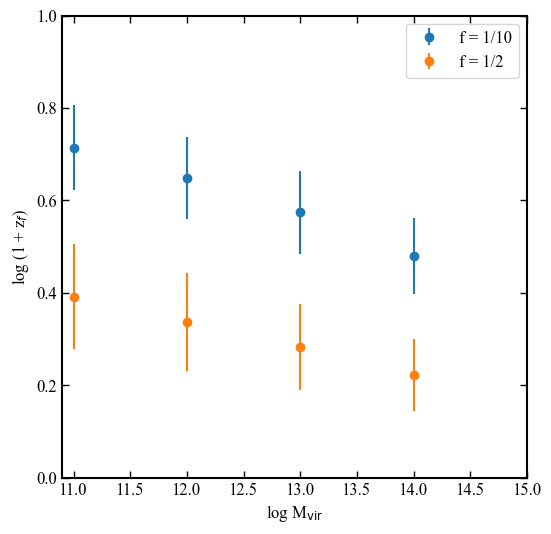

In [46]:
plt.figure(figsize=(6,6))
plt.errorbar(np.unique(masses), z10_meds, yerr=z10_std, fmt="o", label="f = 1/10")
plt.errorbar(np.unique(masses), z50_meds, yerr=z50_std, fmt="o", label="f = 1/2")

plt.legend()
plt.ylim(0,1)
plt.xlim(10.9, 15)
plt.xlabel("log M$_{\\rm vir}$")
plt.ylabel("log (1 + z$_{f}$)")
plt.show()

In [61]:
m11_med = np.median(m11, axis=0)

m12_med = np.median(m12, axis=0)

m13_med = np.median(m13, axis=0)

m14_med = np.median(m14, axis=0)

In [62]:
m11_std = np.std(m11/1e11, axis=0)

m12_std = np.std(m12/1e12, axis=0)

m13_std = np.std(m13/1e13, axis=0)

m14_std = np.std(m14/1e14, axis=0)

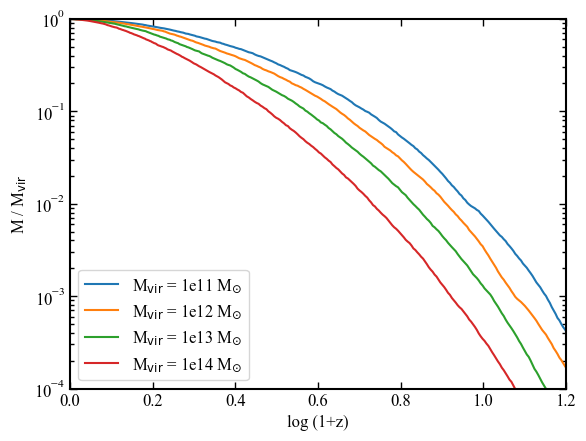

In [63]:
plt.plot(np.log10(1+cfg.zsample), m11_med/1e11, label="M$_{\\rm vir}$ = 1e11 M$_{\\odot}$")

plt.plot(np.log10(1+cfg.zsample), m12_med/1e12, label="M$_{\\rm vir}$ = 1e12 M$_{\\odot}$")

plt.plot(np.log10(1+cfg.zsample), m13_med/1e13, label="M$_{\\rm vir}$ = 1e13 M$_{\\odot}$")

plt.plot(np.log10(1+cfg.zsample), m14_med/1e14, label="M$_{\\rm vir}$ = 1e14 M$_{\\odot}$")

plt.legend()

plt.yscale("log")
plt.ylim(1e-4, 1)
plt.xlim(0,1.2)
plt.xlabel("log (1+z)")
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()

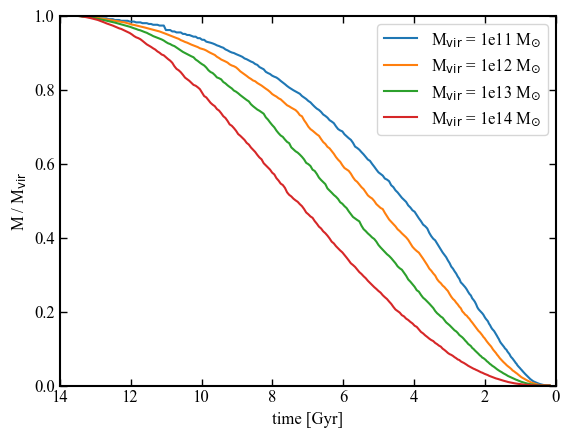

In [90]:
plt.plot(cfg.tsample, m11_med/1e11, label="M$_{\\rm vir}$ = 1e11 M$_{\\odot}$")

plt.plot(cfg.tsample, m12_med/1e12, label="M$_{\\rm vir}$ = 1e12 M$_{\\odot}$")

plt.plot(cfg.tsample, m13_med/1e13, label="M$_{\\rm vir}$ = 1e13 M$_{\\odot}$")

plt.plot(cfg.tsample, m14_med/1e14, label="M$_{\\rm vir}$ = 1e14 M$_{\\odot}$")

plt.legend()
plt.ylim(0,1)
plt.xlim(14, 0)
plt.xlabel('time [Gyr]')
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()

In [98]:
quant_11 = np.percentile(m11, np.array([16, 50, 84]), axis=0, method="closest_observation")

quant_12 = np.percentile(m12, np.array([16, 50, 84]), axis=0, method="closest_observation")

quant_13 = np.percentile(m13, np.array([16, 50, 84]), axis=0, method="closest_observation")

quant_14 = np.percentile(m14, np.array([16, 50, 84]), axis=0, method="closest_observation")


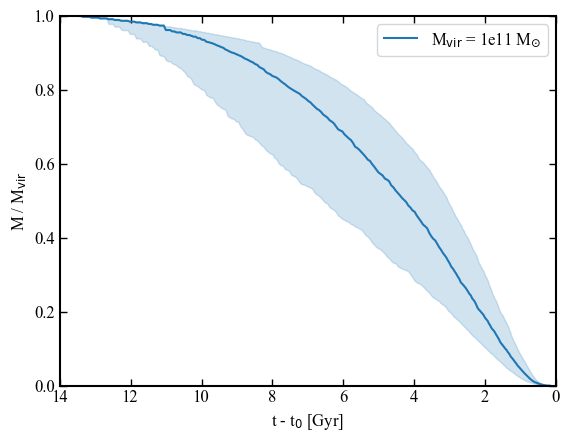

In [99]:
plt.plot(cfg.tsample, quant_11[1]/1e11, label="M$_{\\rm vir}$ = 1e11 M$_{\\odot}$", c="C0")
plt.fill_between(cfg.tsample, y1=quant_11[0]/1e11, y2=quant_11[2]/1e11, alpha=0.2, color="C0")

plt.legend()
plt.ylim(0,1)
plt.xlim(14, 0)
plt.xlabel('t - t$_{0}$ [Gyr]')
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()

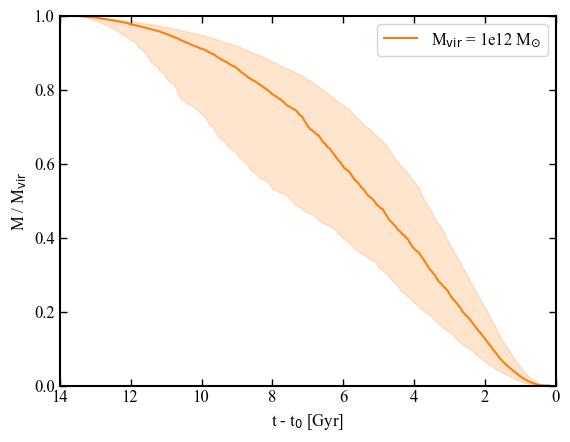

In [100]:
plt.plot(cfg.tsample, quant_12[1]/1e12, label="M$_{\\rm vir}$ = 1e12 M$_{\\odot}$", c="C1")
plt.fill_between(cfg.tsample, y1=quant_12[0]/1e12, y2=quant_12[2]/1e12, alpha=0.2, color="C1")

plt.legend()
plt.ylim(0,1)
plt.xlim(14, 0)
plt.xlabel('t - t$_{0}$ [Gyr]')
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()

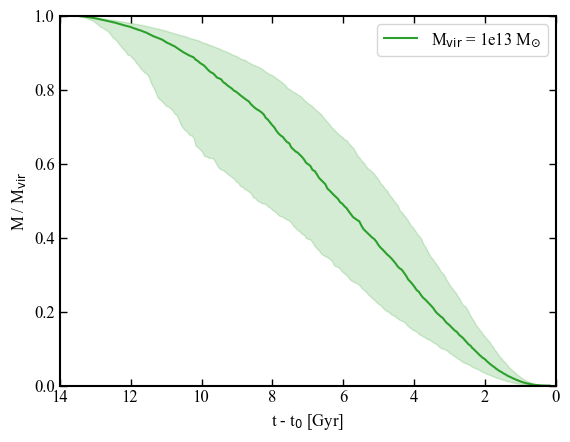

In [101]:
plt.plot(cfg.tsample, quant_13[1]/1e13, label="M$_{\\rm vir}$ = 1e13 M$_{\\odot}$", c="C2")
plt.fill_between(cfg.tsample, y1=quant_13[0]/1e13, y2=quant_13[2]/1e13, alpha=0.2, color="C2")

plt.legend()
plt.ylim(0,1)
plt.xlim(14, 0)
plt.xlabel('t - t$_{0}$ [Gyr]')
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()

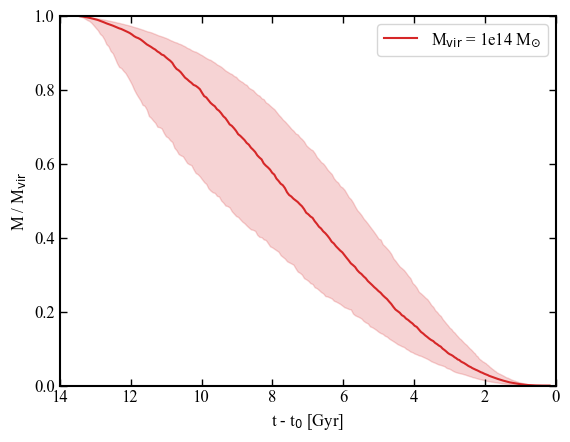

In [102]:
plt.plot(cfg.tsample, quant_14[1]/1e14, label="M$_{\\rm vir}$ = 1e14 M$_{\\odot}$", c="C3")
plt.fill_between(cfg.tsample, y1=quant_14[0]/1e14, y2=quant_14[2]/1e14, alpha=0.2, color="C3")

plt.legend()
plt.ylim(0,1)
plt.xlim(14, 0)
plt.xlabel('t - t$_{0}$ [Gyr]')
plt.ylabel('M / M$_{\mathrm{vir}}$')
plt.show()